# Class 07 ESG Data Identification #

## **Personal Homework Goals**
- Import MSCI Non-ESG and ESG Leader Dataset into JupyterLab
- Explore dataset and identify head, tail, mean, median, and mode
- Try to conduct a preliminary analysis

##  **Importing the necessary libraries and overview of the dataset**

In [28]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### **Loading the dataset**

In [29]:
data = pd.read_csv("emdset 1.csv")

In [30]:
df = data.copy()

### Data Overview

In [31]:
data

,Date,Non ESG EM (Adjusted),ESG EM (Raw),ESG EM (Adjusted)
0,9-Oct-19,993.01,1082.01,1436.01
1,10-Oct-19,996.50,1085.50,1235.50
2,11-Oct-19,1011.54,1100.54,1452.54
3,14-Oct-19,1017.45,1106.45,1591.45
4,15-Oct-19,1019.25,1108.25,1454.25
...,...,...,...,...
1038,2-Oct-23,951.49,1040.49,1387.49
1039,3-Oct-23,939.16,1028.16,1495.16
1040,4-Oct-23,927.86,1016.86,1118.86
1041,5-Oct-23,930.23,1019.23,1195.23


In [32]:
#Shows first five observations
data.head()

,Date,Non ESG EM (Adjusted),ESG EM (Raw),ESG EM (Adjusted)
0,9-Oct-19,993.01,1082.01,1436.01
1,10-Oct-19,996.50,1085.50,1235.50
2,11-Oct-19,1011.54,1100.54,1452.54
3,14-Oct-19,1017.45,1106.45,1591.45
4,15-Oct-19,1019.25,1108.25,1454.25


In [33]:
#Shows last five observations
data.tail()

,Date,Non ESG EM (Adjusted),ESG EM (Raw),ESG EM (Adjusted)
1038,2-Oct-23,951.49,1040.49,1387.49
1039,3-Oct-23,939.16,1028.16,1495.16
1040,4-Oct-23,927.86,1016.86,1118.86
1041,5-Oct-23,930.23,1019.23,1195.23
1042,6-Oct-23,937.34,1026.34,1367.34


In [34]:
data.info()
# There are three 1043 data points of study, interestingly two of them objects and one of them is a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1043 non-null   object 
 1   Non ESG EM (Adjusted)  1043 non-null   float64
 2   ESG EM (Raw)           1043 non-null   float64
 3   ESG EM (Adjusted)      1043 non-null   float64
dtypes: float64(3), object(1)
memory usage: 32.7+ KB


### Analyze metrics of the dataset

In [35]:
#Find the range and mean of ESG Market Capitalizations
max_ESG = df["ESG EM (Adjusted)"].max()
min_ESG = df["ESG EM (Adjusted)"].min()
mean_ESG = df["ESG EM (Adjusted)"].mean()
print("The ESG dataset values range from", min_ESG, "to", max_ESG, "and the mean is", mean_ESG)

The ESG dataset values range from 977.41 to 1987.2 and the mean is 1490.1621380632791


In [36]:
#Find the range of Non-ESG Market Capitalizations
max_NonESG = df["Non ESG EM (Adjusted)"].max()
min_NonESG = df["Non ESG EM (Adjusted)"].min()
mean_NonESG = df["Non ESG EM (Adjusted)"].mean()
print("The Non ESG EM dataset values range from", min_NonESG, "to", max_NonESG, "and the mean is", mean_NonESG)

The Non ESG EM dataset values range from 758.2 to 1444.93 and the mean is 1103.3452636625118


In [37]:
diff_mean=mean_ESG-mean_NonESG
print("The difference between the means of the ESG and Non-ESG indexes is", diff_mean)

The difference between the means of the ESG and Non-ESG indexes is 386.81687440076735


### Plot graph displaying both ESG and Non-ESG Index of Market Cap against each other

In [38]:
#Assign different columns of data into different series
ESG = data['ESG EM (Adjusted)']
NonESG = data['Non ESG EM (Adjusted)']
Date = data['Date']

Text(0.5, 1.0, 'Market Capitalization of ESG-Integrated EM Indices Outperform Non-ESG Integrated EM Indices')

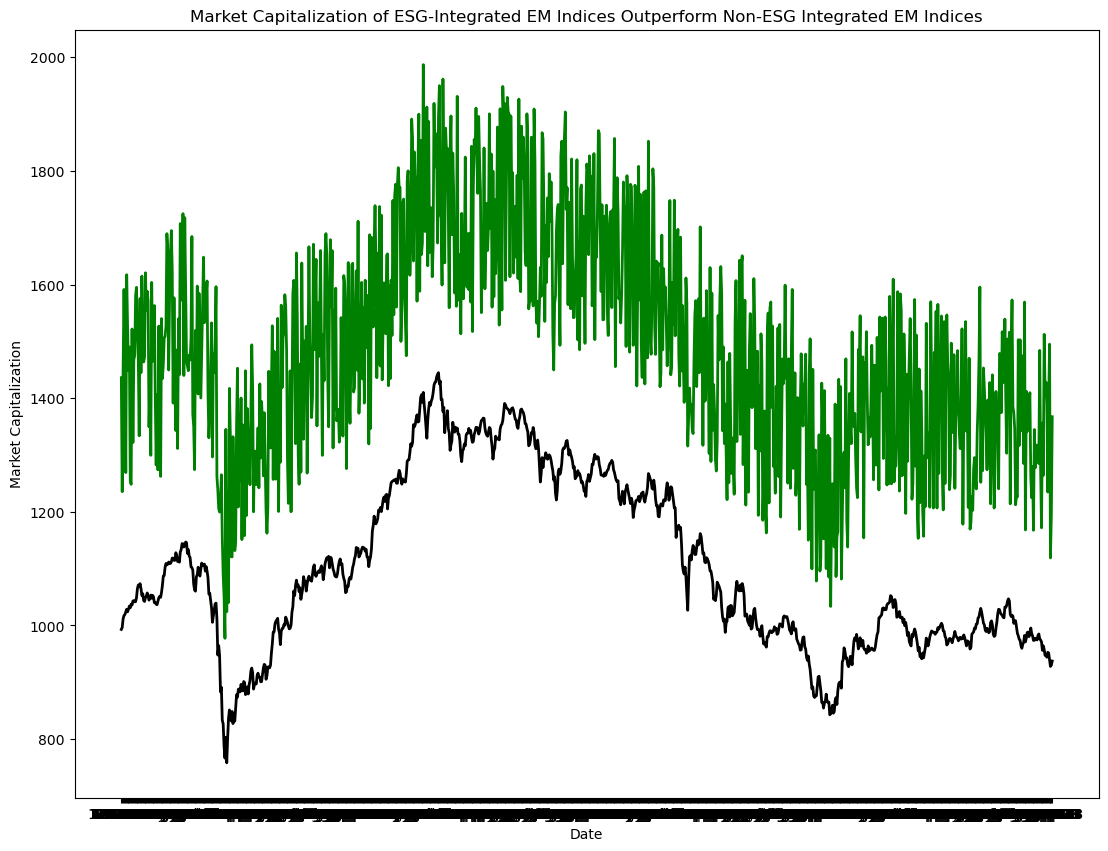

In [39]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(Date, ESG,'green',lw=2)
myaxes.plot(Date, NonESG,'black',lw=2)

#Set labels
myaxes.set_xlabel('Date')
myaxes.set_ylabel('Market Capitalization')
myaxes.set_title(label="Market Capitalization of ESG-Integrated EM Indices Outperform Non-ESG Integrated EM Indices")

### Plot graph displaying % Annualized Returns Compared to Benchmark for Non-ESG Integrated BICS

In [40]:
# Still need to acquire data for Russia

In [41]:
data = pd.read_csv("bricperformance.csv")
ds = data.copy()

In [42]:
data

,Year,China,India,Brazil,South Africa
0,2022,-21.93,-7.49,14.61,-3.04
1,2021,-21.72,26.66,-17.19,4.28
2,2020,29.49,15.90,-18.87,-3.52
3,2019,23.46,7.58,26.66,10.71
4,2018,-18.88,7.30,-0.15,-24.31
5,2017,54.07,38.76,24.48,36.84
6,2016,0.09,-1.43,66.75,18.41
7,2015,-7.82,-6.12,-41.18,-25.13
8,2014,7.96,23.87,-13.74,5.69
9,2013,3.64,-3.83,-15.79,-5.78


In [43]:
#Assign different columns of data into different series
IN = data['India']
CH = data['China']
BR = data['Brazil']
SA = data['South Africa']
YR = data['Year']

Text(0.5, 1.0, 'ESG-Integrated BICS Firms Have Higher Returns On Average Than Aggregate Firm Returns Per Country')

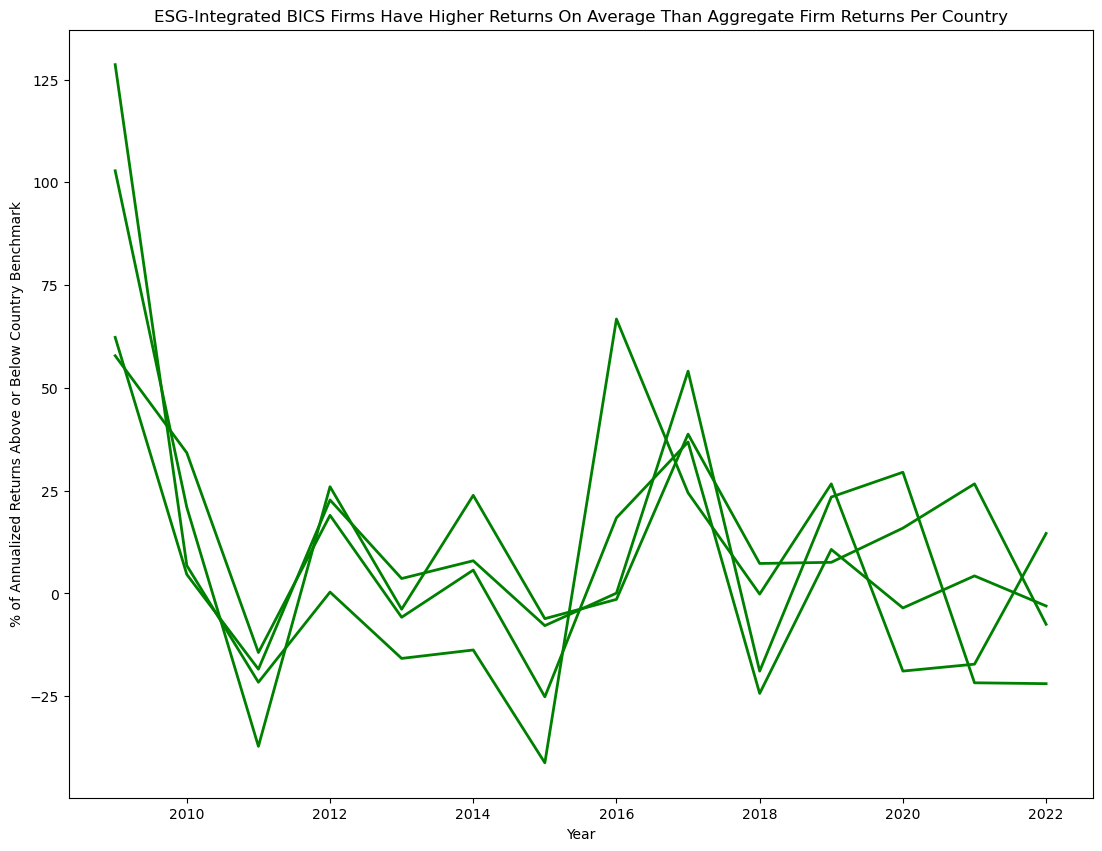

In [44]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(YR, IN,'green',lw=2)
myaxes.plot(YR, CH,'green',lw=2)
myaxes.plot(YR, BR,'green',lw=2)
myaxes.plot(YR, SA,'green',lw=2)

#Set labels
myaxes.set_xlabel('Year')
myaxes.set_ylabel('% of Annualized Returns Above or Below Country Benchmark')
myaxes.set_title(label="ESG-Integrated BICS Firms Have Higher Returns On Average Than Aggregate Firm Returns Per Country")